In [537]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import missingno as msno
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import normaltest # this module based on D’Agostino and Pearson’s test
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer



Lab 1 contains 4 analysis questions. 
The dataset is collected from the New York government. You can find the
detailed data description (columns, building code) here: https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page
Your goal is to fill in the missing blocks and submit the ipynb file as your lab submission to onq. You have until next Wednesday end to complete lab1, but we encourage to complete it as soon as possible.

Question 1: Load in the provided dataset 20to22NYC.csv and summarize the basic statistics. Specifically your code should answer:

1) What are the feature types and their basic statistics (using describe(include='all'))
2) How many features have missing values? 
3) What are the patterns of missing values and potential missing data reason for the top-3 most missed features.

In [538]:
# put your code for Q1 here, you can have multiple code blocks.
df = pd.read_csv('20to22NYC.csv')
df.head(20)

C:\Users\Lap-5\AppData\Local\Temp\ipykernel_10252\4096212099.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('20to22NYC.csv')


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,A1,7 SEGUINE PLACE,NaN,10312.0,1.0,0.0,1.0,3989.0,2300.0,2004.0,1,A1,720000.0,2020-10-15
6,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,115,A5,44 MAY PLACE,NaN,10312.0,1.0,0.0,1.0,2475.0,2495.0,1986.0,1,A5,0.0,2020-12-11
7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,124,A5,22 MAY PLACE,NaN,10312.0,1.0,0.0,1.0,2475.0,2495.0,1986.0,1,A5,0.0,2020-09-17
8,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,145,A5,60 SEGUINE PLACE,NaN,10312.0,1.0,0.0,1.0,1471.0,1172.0,1986.0,1,A5,429000.0,2020-11-19
9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,16,A5,15 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,2550.0,1825.0,1986.0,1,A5,550000.0,2020-10-22


In [539]:
tax_class = df[df['TAX CLASS AT PRESENT'].isnull()]
tax_class.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
17451,4,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,NaN,5375,1219,NaN,"42-29 PARSONS BOULEVARD, 4D",NaN,11355.0,1.0,NaN,1,NaN,NaN,2014.0,2,R4,425880.0,2022-05-25
26099,4,LONG ISLAND CITY,28 COMMERCIAL CONDOS,NaN,447,1001,NaN,"11-05 44TH DRIVE, UNIT1",NaN,11101.0,NaN,1,1,NaN,NaN,1931.0,4,R5,0.0,2022-05-19
26100,4,LONG ISLAND CITY,28 COMMERCIAL CONDOS,NaN,447,1002,NaN,"11-05 44TH DRIVE, UNIT2",NaN,11101.0,NaN,1,1,NaN,NaN,1931.0,4,R5,0.0,2022-05-19
30684,4,RIDGEWOOD,04 TAX CLASS 1 CONDOS,NaN,3564,1001,NaN,"1736 GEORGE STREET, 1",NaN,11385.0,1.0,NaN,1,NaN,NaN,1910.0,1,R6,1100000.0,2022-05-05
30685,4,RIDGEWOOD,04 TAX CLASS 1 CONDOS,NaN,3564,1002,NaN,"17-36 GEORGE STREET, 2",NaN,11385.0,1.0,NaN,1,NaN,NaN,1910.0,1,R6,1250000.0,2022-05-23
41465,1,MIDTOWN EAST,15 CONDOS - 2-10 UNIT RESIDENTIAL,NaN,1327,1305,NaN,"245 EAST 53RD STREET, 5",5,10022.0,NaN,NaN,NaN,NaN,NaN,2017.0,2,R1,1850000.0,2020-05-26
41738,1,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,NaN,1010,1804,NaN,"111 WEST 57TH STREET, 11B",11B,10019.0,NaN,NaN,NaN,NaN,NaN,1924.0,2,R4,2117806.0,2020-04-15
42355,1,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,NaN,860,1313,NaN,"30 EAST 31ST STREET, 8B",8B,10016.0,NaN,NaN,NaN,NaN,NaN,2017.0,2,R4,1340000.0,2020-01-11
42790,1,SOHO,15 CONDOS - 2-10 UNIT RESIDENTIAL,NaN,230,1603,NaN,"10 GREENE STREET, 3",3,10013.0,NaN,NaN,NaN,NaN,NaN,1930.0,2,R1,4511700.0,2020-04-27
61996,2,MOTT HAVEN/PORT MORRIS,28 COMMERCIAL CONDOS,NaN,2308,1001,NaN,"20 BRUCKNER BLVD, UNIT1",NaN,10454.0,NaN,1.0,1.0,NaN,NaN,1931.0,4,R5,0.0,2021-05-19


In [540]:
YEAR_BUILT = df[df['YEAR BUILT'].isnull()]
YEAR_BUILT.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
146,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6302,53,V0,N/A SHELDON AVENUE,NaN,10312.0,0.0,0.0,0.0,4000.0,0.0,NaN,1,V0,0.0,2020-11-15
147,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6302,55,V0,N/A SHELDON AVENUE,NaN,10312.0,0.0,0.0,0.0,2000.0,0.0,NaN,1,V0,0.0,2020-11-15
148,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6302,55,V0,N/A SHELDON AVENUE,NaN,10312.0,0.0,0.0,0.0,2000.0,0.0,NaN,1,V0,70850.0,2020-08-03
149,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6302,56,V0,N/A SHELDON AVENUE,NaN,10312.0,0.0,0.0,0.0,2000.0,0.0,NaN,1,V0,0.0,2020-11-15
150,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6302,56,V0,N/A SHELDON AVENUE,NaN,10312.0,0.0,0.0,0.0,2000.0,0.0,NaN,1,V0,70850.0,2020-08-03
151,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6321,300,V0,N/A ALVINE AVENUE,NaN,10312.0,0.0,0.0,0.0,1394.0,0.0,NaN,1,V0,580000.0,2020-10-08
152,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6431,1,V0,16 SPANISH LANE,NaN,10309.0,0.0,0.0,0.0,1137279.0,0.0,NaN,1,V0,585000.0,2020-08-03
153,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6431,1,V0,54 DISCALA LANE,NaN,10309.0,0.0,0.0,0.0,1150244.0,0.0,NaN,1,V0,0.0,2020-03-06
154,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6431,178,V0,N/A POILLON AVENUE,NaN,10312.0,0.0,0.0,0.0,44607.0,0.0,NaN,1,V0,487500.0,2020-08-03
155,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6431,200,V0,N/A HYLAN BOULEVARD,NaN,10312.0,0.0,0.0,0.0,2630.0,0.0,NaN,1,V0,487500.0,2020-08-03


### 1. Data Types Of columns

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOTAL UNITS     

In [542]:
# we need to cast the `SALE DATE` type from object to DATE
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

## 2. basic statistics 

In [543]:
df.describe(include='all')

C:\Users\Lap-5\AppData\Local\Temp\ipykernel_10252\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,258464.000000,258464,258464,258143,258464.000000,258464.000000,258143,258464,62945,258445.000000,199349.0,162951.0,205304.0,1.569960e+05,1.569960e+05,240618.000000,258464.000000,258464,2.584640e+05,258464
unique,NaN,255,44,10,NaN,NaN,174,241541,9040,NaN,446.0,116.0,475.0,NaN,NaN,NaN,NaN,173,NaN,1096
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,R4,55 AUSTIN PLACE,3A,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,R4,NaN,2022-06-30 00:00:00
freq,NaN,8419,57236,118084,NaN,NaN,41698,24,975,NaN,69433.0,102435.0,58318.0,NaN,NaN,NaN,NaN,41602,NaN,694
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-31 00:00:00
mean,2.982249,NaN,NaN,NaN,4205.347228,390.798494,NaN,NaN,NaN,10850.341763,NaN,NaN,NaN,6.006378e+03,5.488587e+03,1952.672522,1.636955,NaN,1.480856e+06,NaN
std,1.291469,NaN,NaN,NaN,3583.533963,663.856622,NaN,NaN,NaN,562.709495,NaN,NaN,NaN,1.139290e+05,4.887278e+04,36.162119,0.783537,NaN,1.049733e+07,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10001.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,220.000000,1.000000,NaN,0.000000e+00,NaN
25%,2.000000,NaN,NaN,NaN,1251.000000,22.000000,NaN,NaN,NaN,10305.000000,NaN,NaN,NaN,1.900000e+03,1.224000e+03,1925.000000,1.000000,NaN,0.000000e+00,NaN


## 3. features have missing values

In [544]:
df.isna().sum().sort_values(ascending=False)

APARTMENT NUMBER                  195519
LAND SQUARE FEET                  101468
GROSS SQUARE FEET                 101468
COMMERCIAL UNITS                   95513
RESIDENTIAL UNITS                  59115
TOTAL UNITS                        53160
YEAR BUILT                         17846
TAX CLASS AT PRESENT                 321
BUILDING CLASS AT PRESENT            321
ZIP CODE                              19
SALE PRICE                             0
BUILDING CLASS AT TIME OF SALE         0
TAX CLASS AT TIME OF SALE              0
BOROUGH                                0
NEIGHBORHOOD                           0
ADDRESS                                0
LOT                                    0
BLOCK                                  0
BUILDING CLASS CATEGORY                0
SALE DATE                              0
dtype: int64

In [545]:
sum(df.isna().sum() > 0)

10

- There are 10 features which has null values

In [546]:
# !pip install missingno

<AxesSubplot:>

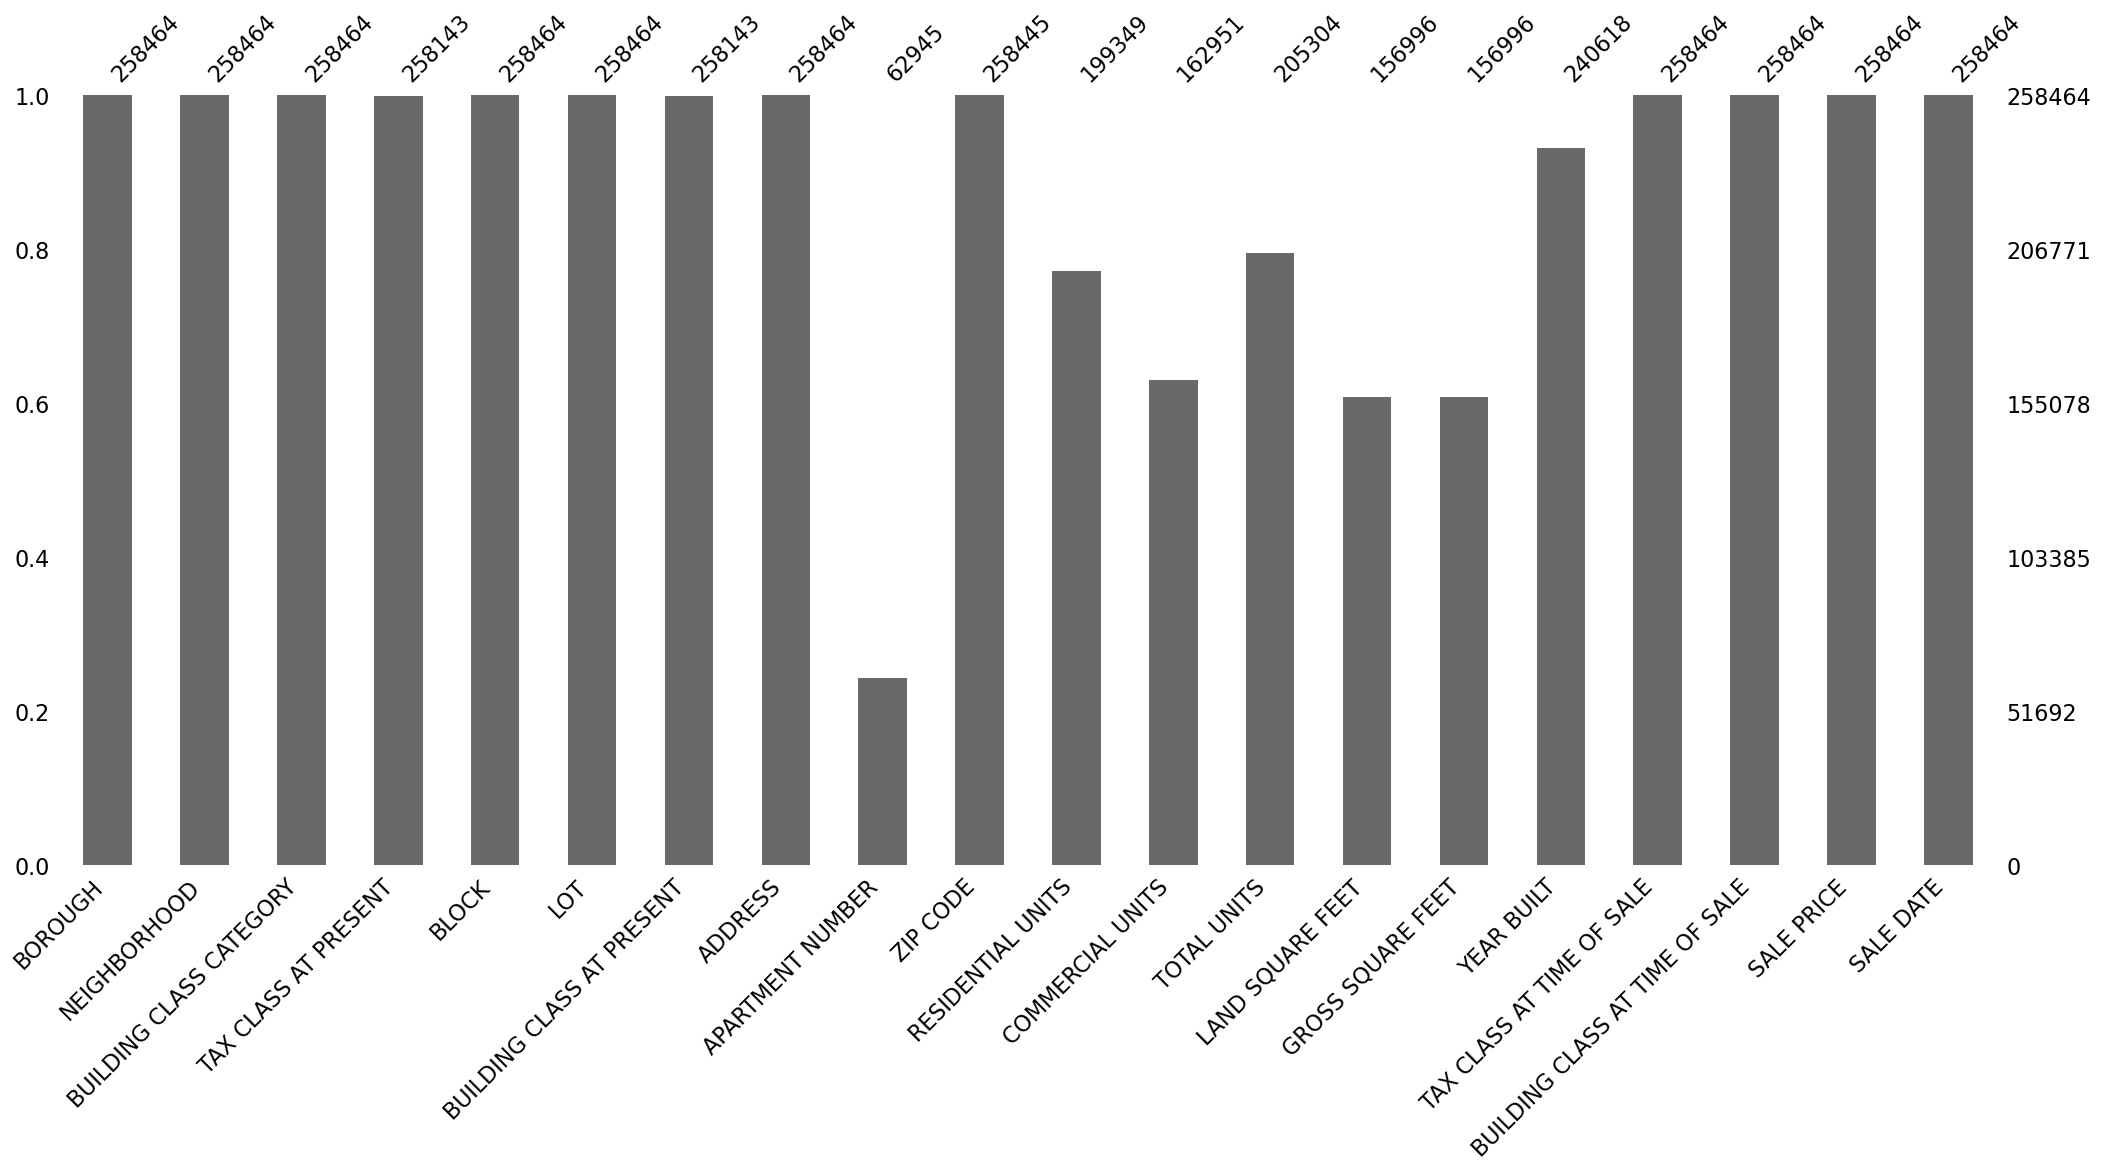

In [548]:
msno.bar(df)

<AxesSubplot:>

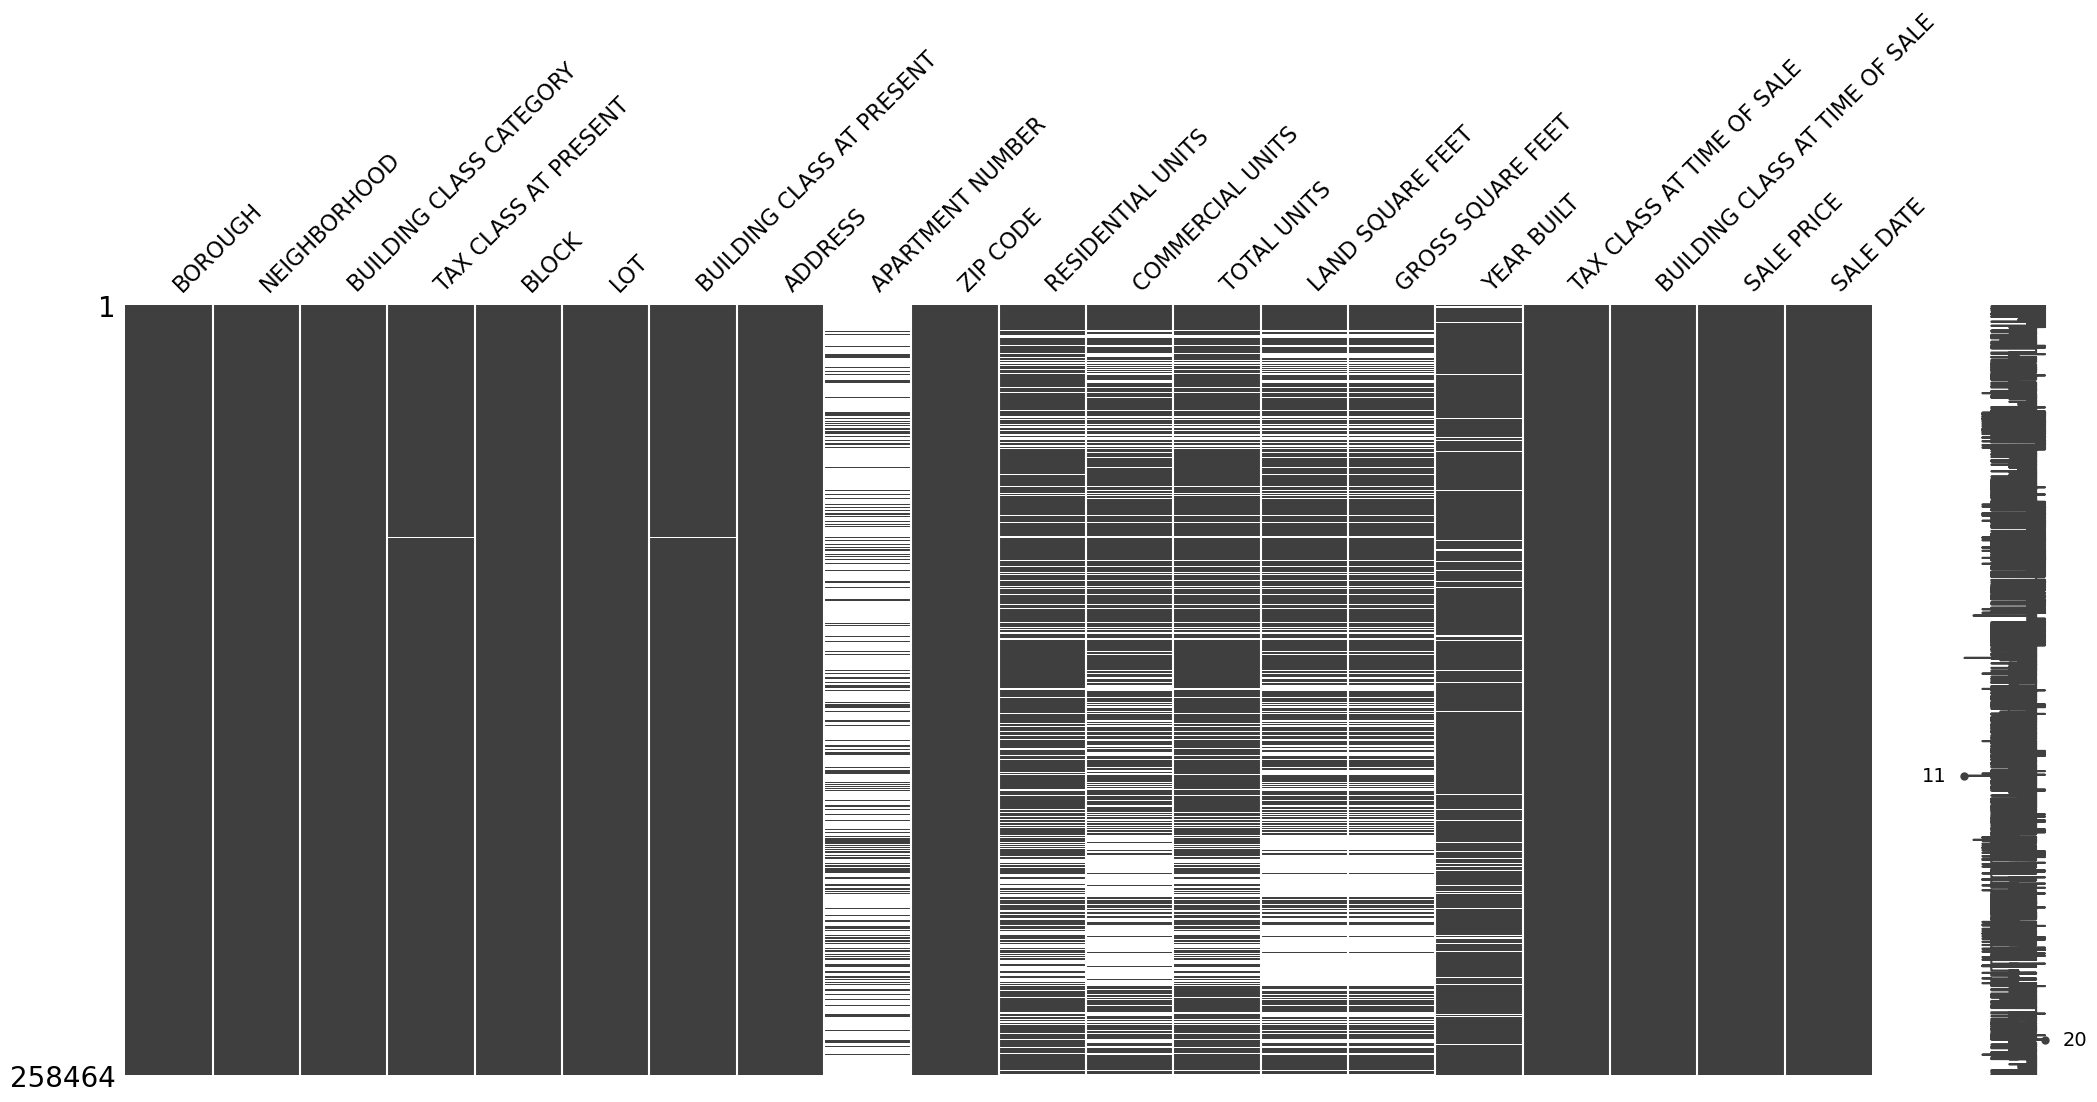

In [549]:
msno.matrix(df)

<AxesSubplot:>

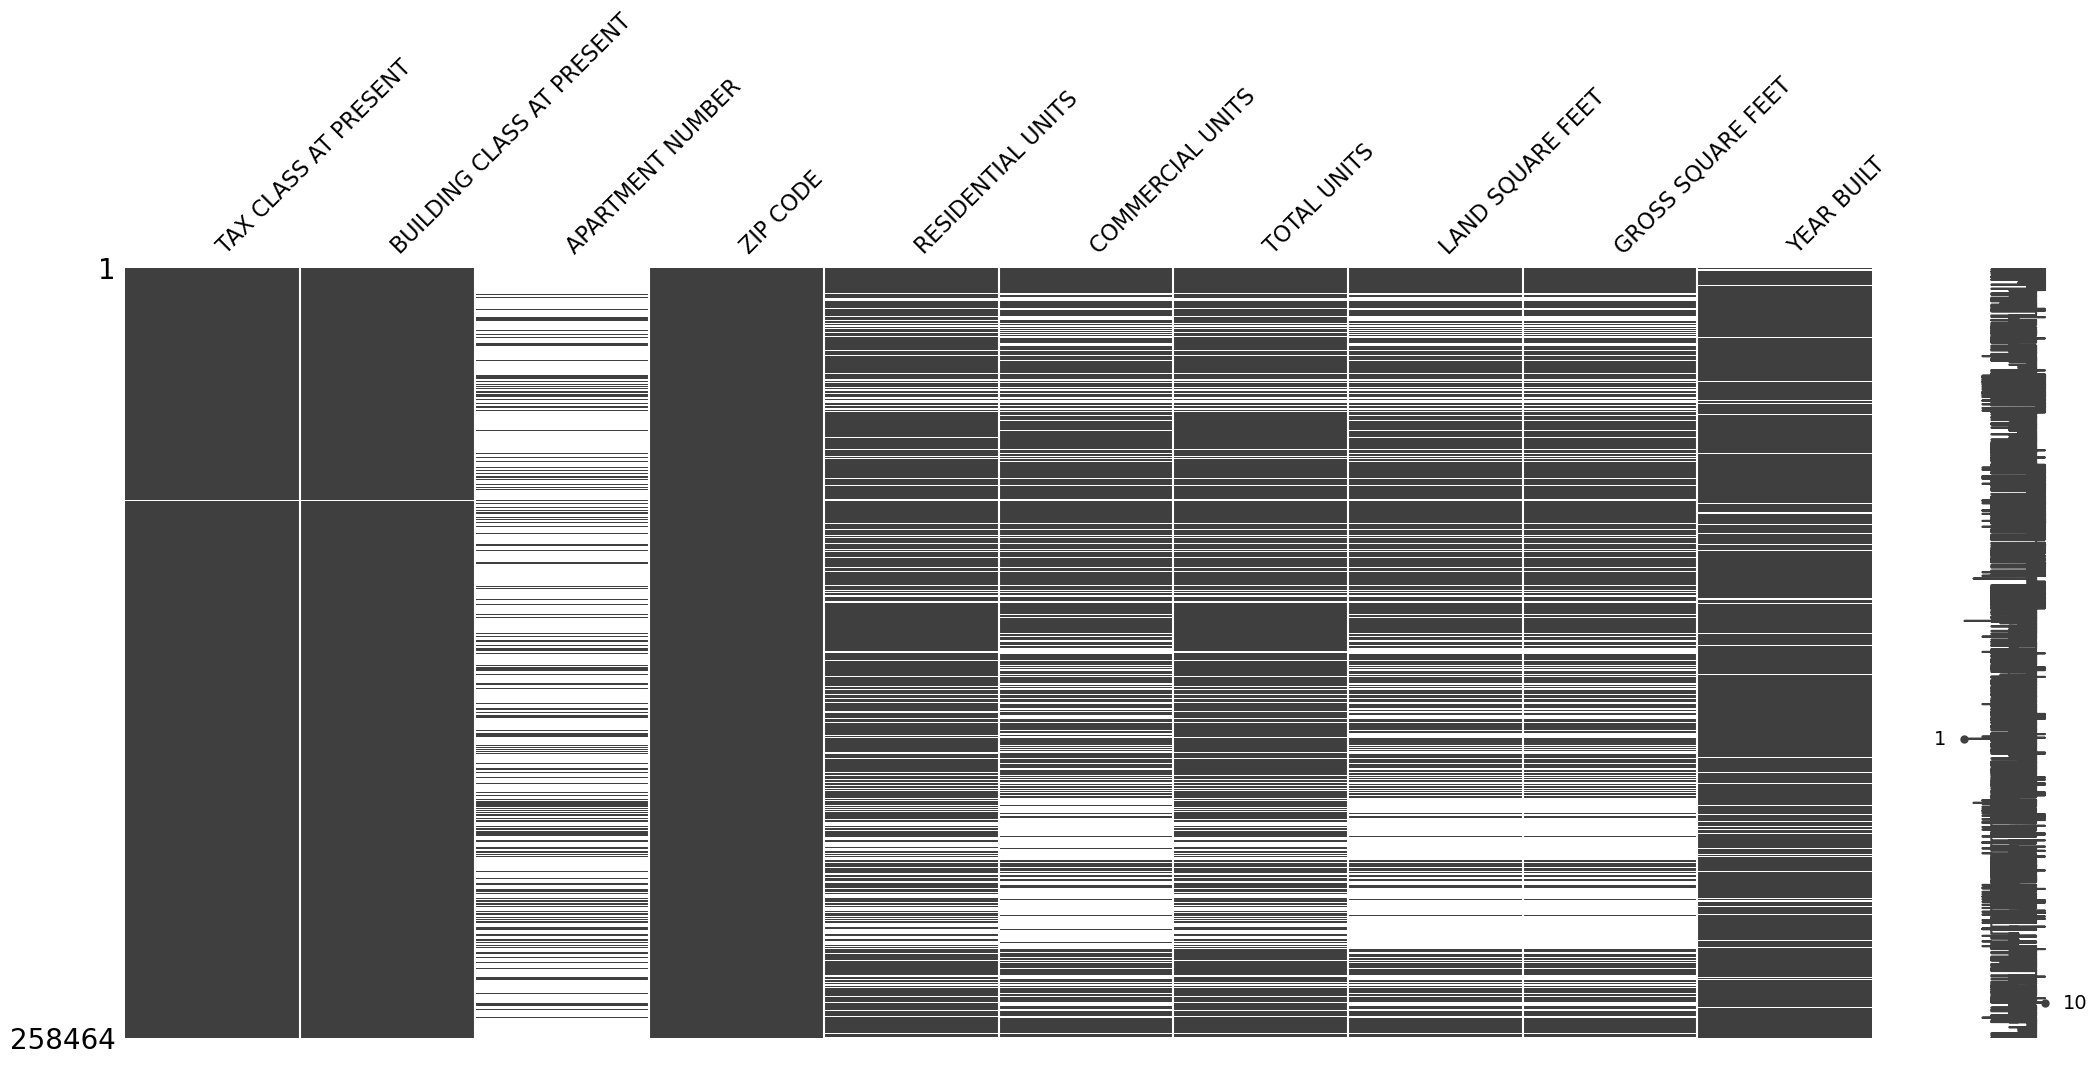

In [550]:
msno.matrix(df[df.columns[df.isnull().any()].tolist()]) # top three features which has the most null values

<AxesSubplot:>

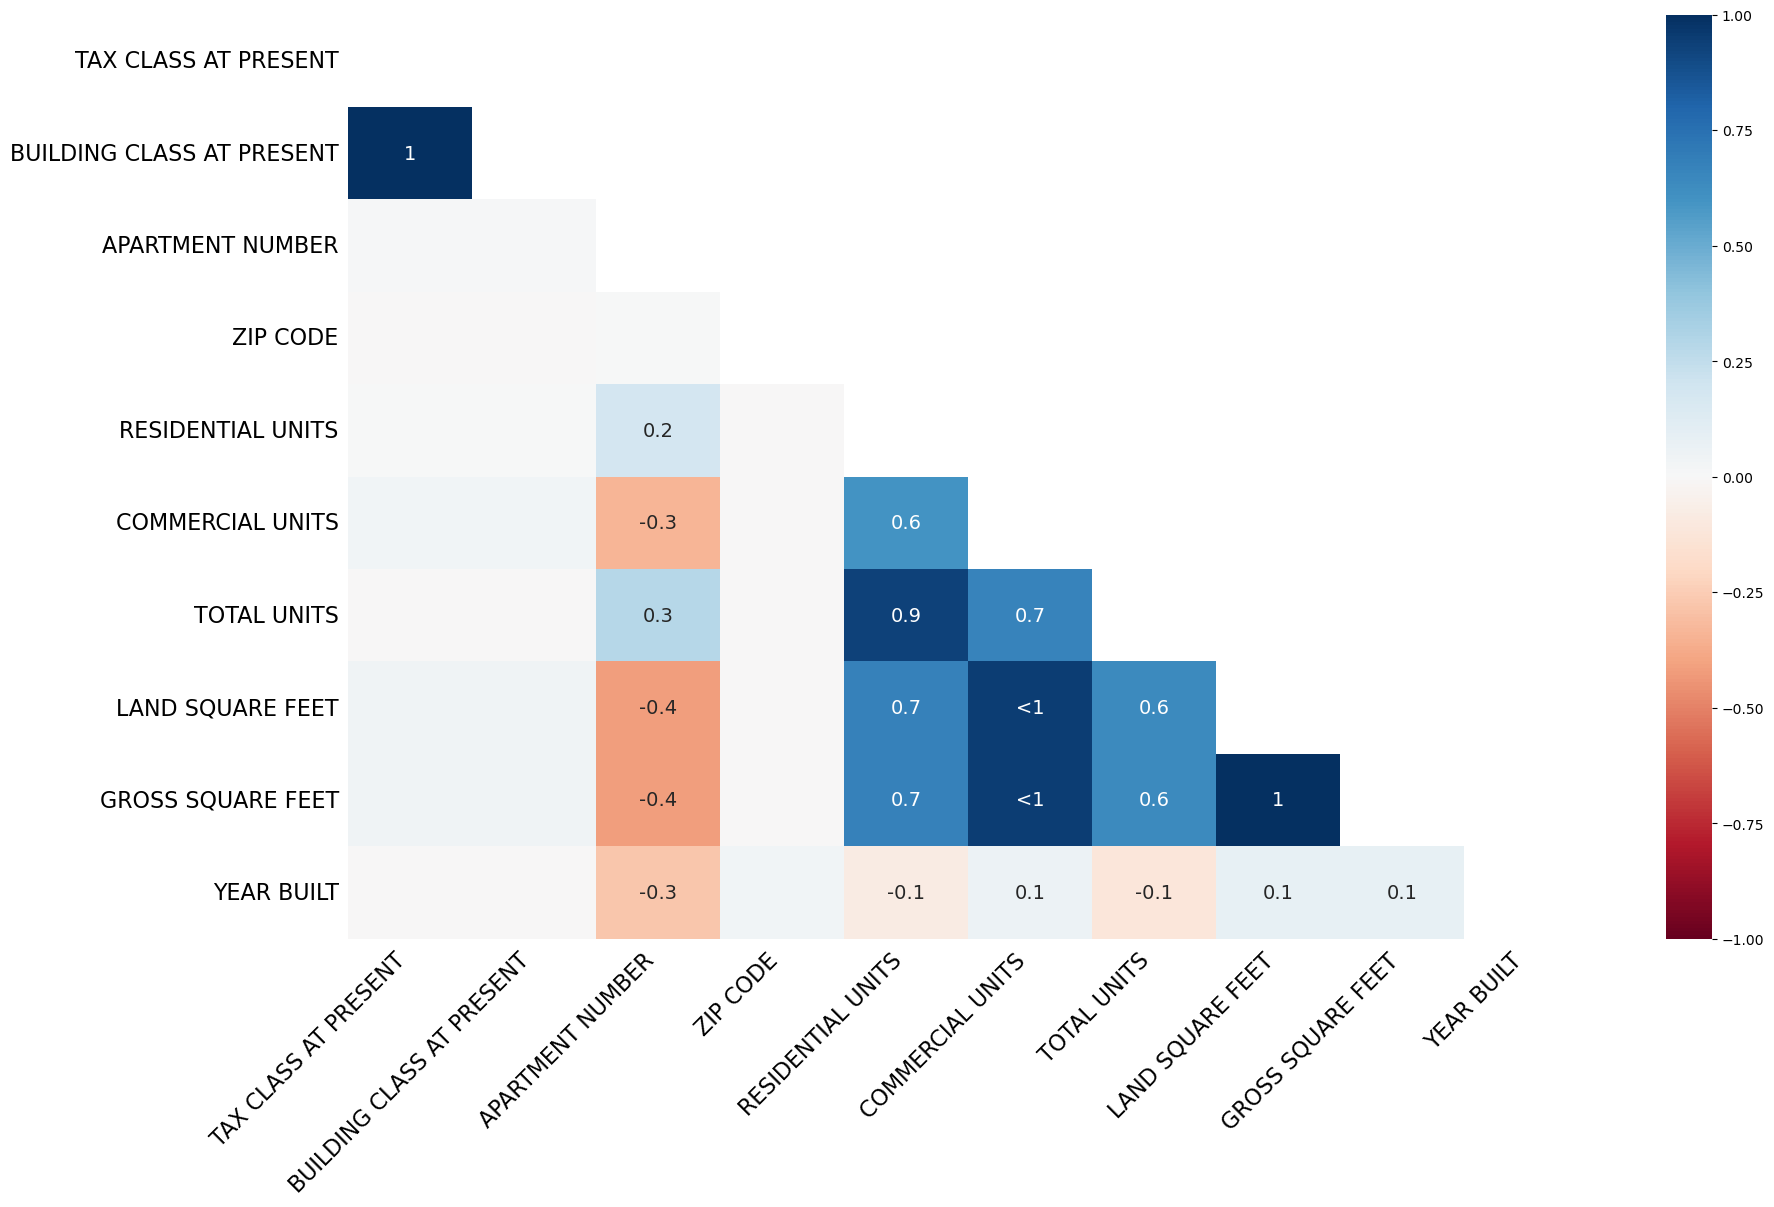

In [551]:
msno.heatmap(df[df.columns[df.isnull().any()].tolist()])

<AxesSubplot:>

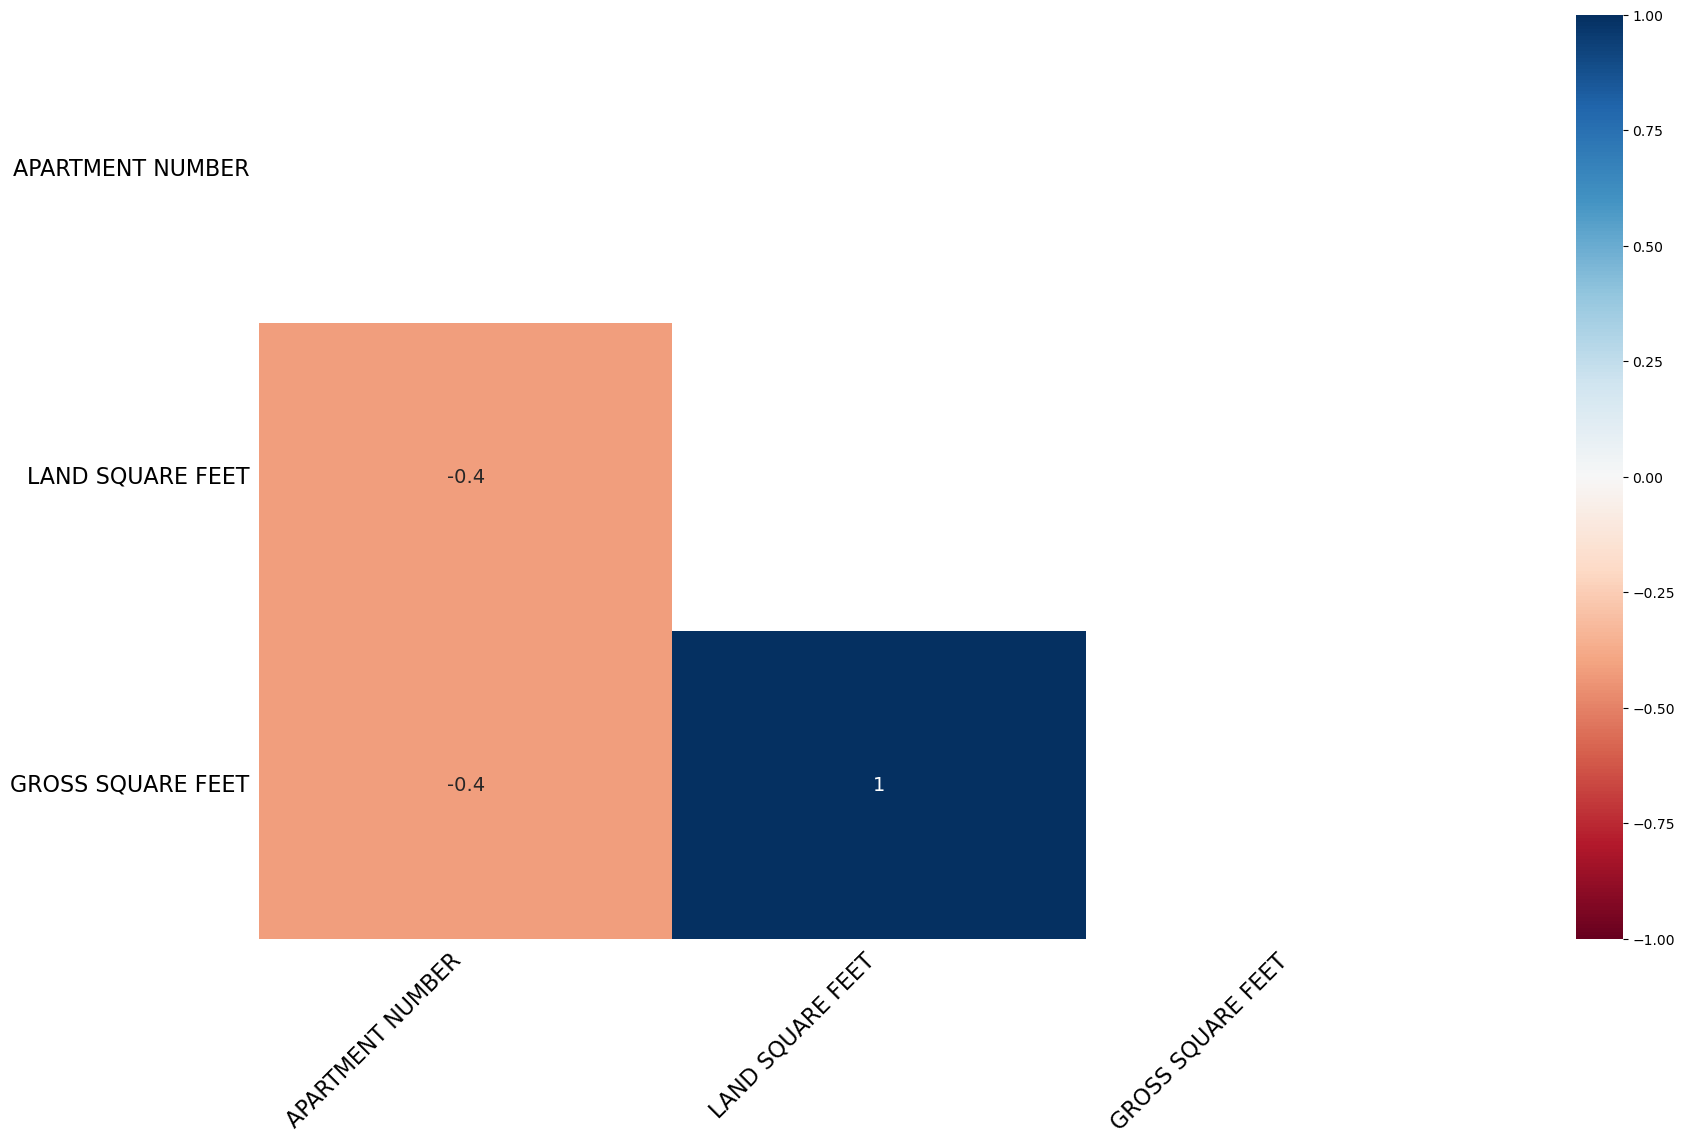

In [552]:
msno.heatmap(df[['APARTMENT NUMBER', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']])

# Summarize your answers to Q1 below, based on your analysis:


- There are 10 features which has null values
    - `APARTMENT NUMBER` is Missing Completly at Random (MCAR)
    - `LAND SQUARE FEET` and `GROSS SQUARE FEET` are missing at random (MCAR)
    - `COMMERCIAL UNITS`,`RESIDENTIAL UNITS`, `TOTAL UNITS` are missing at random (MAR) as they related to each other and we can use each one of them to figure out the others values
    -  `YEAR BUILT` is missing Completly at Random (MCAR)
    - `TAX CLASS AT PRESENT`, `BUILDING CLASS AT PRESENT` are missing Completly at Random (MCAR)


Question 2: Check the normality of the target variable, i.e., 'SALE PRICE', using both graphical and statistical test methods.

<AxesSubplot:ylabel='Frequency'>

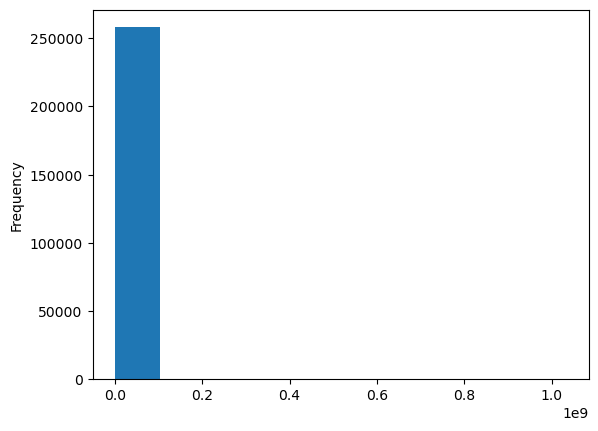

In [553]:
# put your code for Q2 here, you can have multiple code blocks.
df['SALE PRICE'].plot(kind="hist")

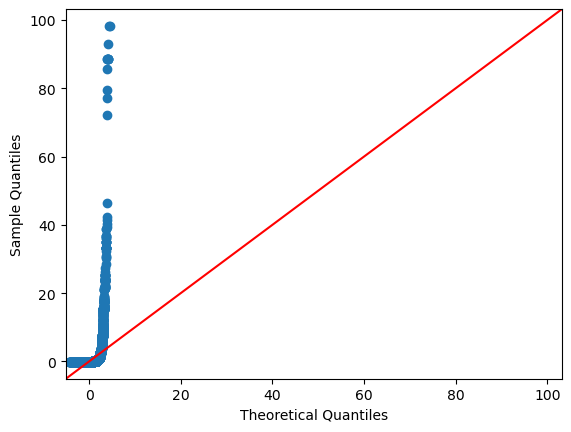

In [554]:
fig = sm.qqplot(df['SALE PRICE'], line='45', fit = True)
plt.show()

In [555]:
statistic, p_value_Agostino = normaltest(df['SALE PRICE'])
w, p_value_shpiro = stats.shapiro(df['SALE PRICE']) #p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
print("p_value Agostino = {:g}".format(p_value_Agostino))
print("p_value shapiro = {:g}".format(p_value_shpiro))

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html 

p_value Agostino = 0
p_value shapiro = 0


C:\Users\Lap-5\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- H0: The data is normally distributed
- H1: the data is not normally distributed
- We can reject the null as the p-value is zero

# Summarize your answers to Q2 below, based on your analysis:


- H0: The data is normally distributed
- H1: the data is not normally distributed
- We can reject the null as the p-value is zero
- The graphs shows that the data is not normally distributed.
- The statstical test tells that the data is not normally distributed as the p-value is equal to Zero so we can reject the null hypothesis and say that the data is not normally distributed

Question 3: Design hypothesis test to answer the following two questions:

"Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

For each question, you need to give the null hypothesis $H_0$ and alternative hypothesis $H_1$


## 1. Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?

In [556]:
before_March = df[df['SALE DATE'] < '2020-03-01']['SALE PRICE'] # sale price before march
after_March = df[df['SALE DATE'] >= '2020-03-1']['SALE PRICE'] # sale price in and after march

In [557]:
before_March.mean(), after_March.mean()

(1677444.1585827558, 1469598.7907021455)

- H0: The Average Sale price Before March is equal to The Average Sale price After March (u0 = u1)
- H1: The Average Sale price Before March is Not equal to The Average Sale price After March (u0 != u1)

In [558]:
stats.mannwhitneyu(x=before_March, y=after_March, alternative = 'two-sided')

MannwhitneyuResult(statistic=1583065332.5, pvalue=1.581298780560428e-51)

- The P-value is very small it is smaller than 5% so we can reject the null hypothesis
- There is a statstical difference between u0 and u1 so the average sales price after match is different than before March.

In [559]:
# stats.mannwhitneyu(x=before_March, y=after_March, alternative = 'greater')

In [560]:
# stats.mannwhitneyu(x=before_March, y=after_March, alternative = 'less')

## 2. Do properties in Manhattan sell at higher prices than properties elsewhere?

In [561]:
# put your code for Q3 here, you can have multiple code blocks.
manhattan = df[df['BOROUGH'] == 1]['SALE PRICE']
other_properties = df[df['BOROUGH'] != 1]['SALE PRICE']

In [562]:
# manhattan.mean(), other_properties.mean()

In [563]:
# manhattan.median(), other_properties.median()

- H0: manhattan (u0) sales price is less than or equal other properties sales price (u1) -> (u0 <= u1)
- H1: manhattan (u0) sales price is greater than other properties sales price (u1) -> (u0 > u1)

In [564]:
stats.mannwhitneyu(x= manhattan, y=other_properties, alternative = 'greater')

MannwhitneyuResult(statistic=7766719022.0, pvalue=0.0)

In [565]:
# manhattan.plot(kind="hist")

In [566]:
# other_properties.plot(kind="hist")

# Summarize your answers to Q3 below, based on your analysis:

- Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?
    - H0: The Average Sale price Before March (u0) is equal to The Average Sale price After March(u1) -> (u0 = u1)
    - H1: The Average Sale price Before March (u0) is Not equal to The Average Sale price After March(u1) -> (u0 != u1)
    - The P-value is very small it is smaller than 5% so we can reject the null hypothesis
    - So there is a statstical difference between u0 and u1 so the average sales price after match is different than before March.
- Do properties in Manhattan sell at higher prices than properties elsewhere?
   - H0: manhattan (u0) sales price is less than or equal other properties sales price (u1) -> (u0 <= u1)
   - H1: manhattan (u0) sales price is greater than other properties sales price (u1) -> (u0 > u1)
   - The P-value is 0 it is smaller than 5% so we can reject the null hypothesis
   - So there is a statstical difference between u0 and u1 so the average sales price of manhattan is greater than other properties

Question 4: Perform a multiple linear regression analysis on the given data, considering impact of missing values. Note, you need to properly transfer categorical features to numerical features first.
Report the features that are significant relevant to sale price based on the results of your regression model.

In [567]:
# put your code for Q4 here, you can have multiple code blocks.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BOROUGH                         258464 non-null  int64         
 1   NEIGHBORHOOD                    258464 non-null  object        
 2   BUILDING CLASS CATEGORY         258464 non-null  object        
 3   TAX CLASS AT PRESENT            258143 non-null  object        
 4   BLOCK                           258464 non-null  int64         
 5   LOT                             258464 non-null  int64         
 6   BUILDING CLASS AT PRESENT       258143 non-null  object        
 7   ADDRESS                         258464 non-null  object        
 8   APARTMENT NUMBER                62945 non-null   object        
 9   ZIP CODE                        258445 non-null  float64       
 10  RESIDENTIAL UNITS               199349 non-null  object 

In [568]:
# divide date column into day, month and year 
df['SALE DAY'] = df['SALE DATE'].dt.day
df['SALE MONTH'] = df['SALE DATE'].dt.month
df['SALE YEAR'] = df['SALE DATE'].dt.year
df.drop(['SALE DATE'], axis=1, inplace= True)


In [569]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DAY,SALE MONTH,SALE YEAR
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,...,1.0,3067.0,910.0,2002.0,1,A5,0.0,2,7,2020
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,...,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2,10,2020
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,...,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,24,6,2020
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,...,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2,7,2020
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,...,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,14,1,2020


## Trial 1: droping some columns then drop null values

In [570]:
df_trial1 = df.drop(['APARTMENT NUMBER', 'ZIP CODE', 'ADDRESS', 'SALE DAY', 'SALE MONTH'], axis=1) # we assume that those columns not correlated with our target varible so we gonna drop them

In [571]:
df_trial1 = df_trial1[df_trial1['SALE PRICE'] > 20] # remove some outlier points

In [572]:
df_trial1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180166 entries, 1 to 258461
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         180166 non-null  int64  
 1   NEIGHBORHOOD                    180166 non-null  object 
 2   BUILDING CLASS CATEGORY         180166 non-null  object 
 3   TAX CLASS AT PRESENT            179854 non-null  object 
 4   BLOCK                           180166 non-null  int64  
 5   LOT                             180166 non-null  int64  
 6   BUILDING CLASS AT PRESENT       179854 non-null  object 
 7   RESIDENTIAL UNITS               128584 non-null  object 
 8   COMMERCIAL UNITS                98699 non-null   object 
 9   TOTAL UNITS                     133252 non-null  object 
 10  LAND SQUARE FEET                94031 non-null   float64
 11  GROSS SQUARE FEET               94031 non-null   float64
 12  YEAR BUILT      

In [573]:
df_trial1 = df_trial1.dropna().reset_index() # drop null values

In [574]:
df_trial1['RESIDENTIAL UNITS'] = df_trial1['RESIDENTIAL UNITS'].apply(lambda x : str(x).replace(',',''))
df_trial1['COMMERCIAL UNITS'] = df_trial1['COMMERCIAL UNITS'].apply(lambda x : str(x).replace(',',''))
df_trial1['TOTAL UNITS'] = df_trial1['TOTAL UNITS'].apply(lambda x : str(x).replace(',',''))
df_trial1['RESIDENTIAL UNITS'] = df_trial1['RESIDENTIAL UNITS'].astype(float)
df_trial1['COMMERCIAL UNITS'] = df_trial1['COMMERCIAL UNITS'].astype(float)
df_trial1['TOTAL UNITS'] = df_trial1['TOTAL UNITS'].astype(float)
df_trial1['BOROUGH'] = df_trial1['BOROUGH'].astype('category')
df_trial1['SALE YEAR'] = df_trial1['SALE YEAR'].astype('category')

In [575]:
numeric_cols = df_trial1.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = df_trial1.select_dtypes(include=['object', 'category']).columns.tolist()

In [576]:
numeric_cols = df_trial1.drop('SALE PRICE', axis=1).select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = df_trial1.select_dtypes(include=['object', 'category']).columns.tolist()

# Separate the categorical and numerical features
numeric_features = numeric_cols
categorical_features = categorical_cols

# Create the StandardScaler object and fit_transform the numerical features
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(df_trial1[numeric_features])

# Create a new dataframe with the scaled numerical features and the original categorical features
scaled_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features)
scaled_df['SALE PRICE'] = df_trial1['SALE PRICE']
scaled_df[categorical_features] = df_trial1[categorical_features]

# Print the scaled dataframe
pd.DataFrame(scaled_df).head()

,index,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,SALE YEAR
0,-1.524638,0.065543,-0.324296,-0.084271,-0.038235,-0.090552,0.003167,-0.054437,1.442542,-0.437057,315000.0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,A1,2020
1,-1.524624,0.066347,-0.413269,-0.084271,-0.038235,-0.090552,-0.008933,-0.072011,0.786823,-0.437057,450000.0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,A1,2020
2,-1.524611,0.071168,-0.357661,-0.084271,-0.038235,-0.090552,-0.033807,-0.094109,-0.638653,-0.437057,525000.0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,A2,2020
3,-1.524597,0.280096,-0.388801,-0.084271,-0.038235,-0.090552,-0.038210,-0.083825,1.100428,-0.437057,480000.0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A5,A5,2020
4,-1.524583,0.280096,-0.241996,-0.084271,-0.038235,-0.090552,-0.023797,-0.076568,1.613600,-0.437057,720000.0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,A1,2020


In [577]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89043 entries, 0 to 89042
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   index                           89043 non-null  float64 
 1   BLOCK                           89043 non-null  float64 
 2   LOT                             89043 non-null  float64 
 3   RESIDENTIAL UNITS               89043 non-null  float64 
 4   COMMERCIAL UNITS                89043 non-null  float64 
 5   TOTAL UNITS                     89043 non-null  float64 
 6   LAND SQUARE FEET                89043 non-null  float64 
 7   GROSS SQUARE FEET               89043 non-null  float64 
 8   YEAR BUILT                      89043 non-null  float64 
 9   TAX CLASS AT TIME OF SALE       89043 non-null  float64 
 10  SALE PRICE                      89043 non-null  float64 
 11  BOROUGH                         89043 non-null  category
 12  NEIGHBORHOOD      

In [578]:

# Use pandas get_dummies function to one-hot encode the data
one_hot = pd.get_dummies(scaled_df)

# Print the one-hot encoded data
# print(one_hot)

In [579]:
final_data = pd.DataFrame(one_hot)
final_data

,index,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,...,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z4,BUILDING CLASS AT TIME OF SALE_Z5,BUILDING CLASS AT TIME OF SALE_Z9,SALE YEAR_2020,SALE YEAR_2021,SALE YEAR_2022
0,-1.524638,0.065543,-0.324296,-0.084271,-0.038235,-0.090552,0.003167,-0.054437,1.442542,-0.437057,...,0,0,0,0,0,0,0,1,0,0
1,-1.524624,0.066347,-0.413269,-0.084271,-0.038235,-0.090552,-0.008933,-0.072011,0.786823,-0.437057,...,0,0,0,0,0,0,0,1,0,0
2,-1.524611,0.071168,-0.357661,-0.084271,-0.038235,-0.090552,-0.033807,-0.094109,-0.638653,-0.437057,...,0,0,0,0,0,0,0,1,0,0
3,-1.524597,0.280096,-0.388801,-0.084271,-0.038235,-0.090552,-0.038210,-0.083825,1.100428,-0.437057,...,0,0,0,0,0,0,0,1,0,0
4,-1.524583,0.280096,-0.241996,-0.084271,-0.038235,-0.090552,-0.023797,-0.076568,1.613600,-0.437057,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89038,2.011306,-0.768022,-0.319847,-0.107716,0.061773,-0.090552,0.043409,0.113102,0.330671,3.486542,...,0,0,0,0,0,0,0,0,1,0
89039,2.011375,-0.761058,-0.406596,-0.107716,0.061773,-0.090552,0.045184,0.260268,-0.524615,3.486542,...,0,0,0,0,0,0,0,0,1,0
89040,2.011388,-1.057842,-0.315398,-0.107716,0.061773,-0.090552,-0.033807,-0.057041,1.242976,3.486542,...,0,0,0,0,0,0,0,0,1,0
89041,2.011402,-1.028110,-0.399923,-0.107716,0.061773,-0.090552,-0.003555,0.113818,-0.467596,3.486542,...,0,0,0,0,0,0,0,0,1,0


In [589]:
# Create an example dataset
y = final_data['SALE PRICE']
X = final_data.drop('SALE PRICE', axis=1)
X.drop('index', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Create the LinearRegression object
reg = LinearRegression()

# Fit the model using the training data
reg.fit(X_train, y_train)

# Predict the output for the test data
y_pred = reg.predict(X_test)

# Print the predicted output
print(y_pred)

[ 222720. 1131008. 1627136. ...  727552. 4905984.  770560.]


In [590]:
from sklearn.metrics import mean_squared_error
# Compute the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the mean squared error
print(rmse)

2603950565835475.5


In [591]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the mean squared error
print(rmse)

13899926.110872237


In [592]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=1.0, fit_intercept=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the mean squared error
print(rmse)

13884786.300617449


C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.290e+18, tolerance: 1.370e+15
  model = cd_fast.enet_coordinate_descent(


In [594]:
# X.drop('index', axis=1, inplace=True)

In [595]:
import statsmodels.api as sm
X = sm.add_constant(X)
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()
# Print the model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     84.82
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        01:46:15   Log-Likelihood:            -1.5742e+06
No. Observations:               89043   AIC:                         3.149e+06
Df Residuals:                   88546   BIC:                         3.154e+06
Df Model:                         496                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                               2.837e+06   6.92e+05      4.097      0.000    1.48e+06    4.19e+06
BLOCK                                                              -1.422e+05   3.15e+05     -0.452      0.651   -7.59e+05    4.74e+05
LOT                                                                -4.376e+04    8.5e+04     -0.515      0.607    -2.1e+05    1.23e+05
RESIDENTIAL UNITS                                                  -2.261e+06   6.86e+04    -32.973      0.000    -2.4e+06   -2.13e+06
COMMERCIAL UNITS                                                    6.008e+05   4.77e+04     12.608      0.000    5.07e+05    6.94e+05
TOTAL UNITS                                                        -2.059e+06   6.29e+04    -32.762      0.000   -2.18e+06   -1.94e+06
LAND SQUARE FEET                                                   -4.358e+06   1.14e+05    -38.320      0.000   -4.58e+06   -4.14e+06
GROSS SQUARE FEET                                                    7.78e+06   1.78e+05     43.706      0.000    7.43e+06    8.13e+06
YEAR BUILT                                                          4.276e+04    5.5e+04      0.777      0.437   -6.51e+04    1.51e+05
TAX CLASS AT TIME OF SALE                                           1.046e+06   7.92e+05      1.321      0.187   -5.06e+05     2.6e+06
BOROUGH_1                                                           4.925e+06   4.05e+05     12.149      0.000    4.13e+06    5.72e+06
BOROUGH_2                                                          -1.209e+06   3.76e+05     -3.213      0.001   -1.95e+06   -4.71e+05
BOROUGH_3                                                           3.563e+04   1.97e+05      0.181      0.856    -3.5e+05    4.22e+05
BOROUGH_4                                                           -2.19e+05    6.9e+05     -0.317      0.751   -1.57e+06    1.13e+06
BOROUGH_5                                                          -6.953e+05   7.04e+05     -0.987      0.323   -2.08e+06    6.85e+05
NEIGHBORHOOD_AIRPORT LA GUARDIA                                    -6.192e+05   3.71e+06     -0.167      0.867   -7.89e+06    6.65e+06
NEIGHBORHOOD_ALPHABET CITY                                         -4.083e+06   1.26e+06     -3.246      0.001   -6.55e+06   -1.62e+06
NEIGHBORHOOD_ANNADALE                                               -1.25e+05    9.1e+05     -0.137      0.891   -1.91e+06    1.66e+06
NEIGHBORHOOD_ARDEN HEIGHTS                                         -3.106e+05   8.12e+05     -0.382      0.702    -1.9e+06    1.28e+06
NEIGHBORHOOD_ARROCHAR                                                -3.6e+05   1.55e+06     -0.233      0.816   

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


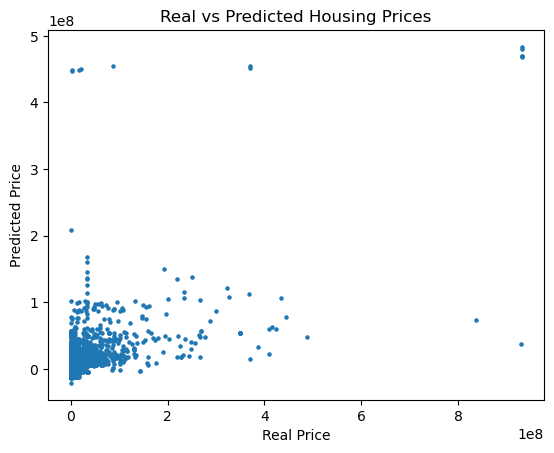

In [596]:
plt.scatter(y_train, reg.predict(X_train.values), s=5 )
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title( "Real vs Predicted Housing Prices")
plt.show()

# Trial 2 using imputers

In [600]:
df_trial2 = df.drop(['APARTMENT NUMBER', 'ZIP CODE', 'ADDRESS', 'SALE DAY', 'SALE MONTH'], axis=1) # those columns has nothing to do with our target varible so we gonna drop them
df_trial2 = df_trial2[df_trial2['SALE PRICE'] > 20]

df_trial2['RESIDENTIAL UNITS'] = df_trial2['RESIDENTIAL UNITS'].apply(lambda x : str(x).replace(',',''))
df_trial2['COMMERCIAL UNITS'] = df_trial2['COMMERCIAL UNITS'].apply(lambda x : str(x).replace(',',''))
df_trial2['TOTAL UNITS'] = df_trial2['TOTAL UNITS'].apply(lambda x : str(x).replace(',',''))
df_trial2['RESIDENTIAL UNITS'] = df_trial2['RESIDENTIAL UNITS'].astype(float)
df_trial2['COMMERCIAL UNITS'] = df_trial2['COMMERCIAL UNITS'].astype(float)
df_trial2['TOTAL UNITS'] = df_trial2['TOTAL UNITS'].astype(float)
df_trial2['BOROUGH'] = df_trial2['BOROUGH'].astype('category')
df_trial2['SALE YEAR'] = df_trial2['SALE YEAR'].astype('category')
numeric_cols = df_trial1.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = df_trial1.select_dtypes(include=['object', 'category']).columns.tolist()



numeric_cols = df_trial2.drop('SALE PRICE', axis=1).select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = df_trial2.select_dtypes(include=['object', 'category']).columns.tolist()

# Separate the categorical and numerical features
numeric_features = numeric_cols
categorical_features = categorical_cols

# Create the StandardScaler object and fit_transform the numerical features
scaler = StandardScaler()
imputer_numeric = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(df_trial2[numeric_features])

scaled_numeric_features = scaler.fit_transform(X_imputed)

imputer_cat = SimpleImputer(strategy='most_frequent')
cat_imputed = imputer_cat.fit_transform(df_trial2[categorical_features])



# Create a new dataframe with the scaled numerical features and the original categorical features
scaled_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features)
scaled_df['SALE PRICE'] = df_trial2['SALE PRICE']
scaled_df[categorical_features] = cat_imputed

# Print the scaled dataframe
pd.DataFrame(scaled_df).head()

scaled_df = scaled_df.dropna().reset_index() # drop null values

# Use pandas get_dummies function to one-hot encode the data
one_hot = pd.get_dummies(scaled_df)

# Print the one-hot encoded data
# print(one_hot)
final_data = pd.DataFrame(one_hot)

# Create an example dataset
y = final_data['SALE PRICE']
X = final_data.drop('SALE PRICE', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LinearRegression object
reg = LinearRegression()

# Fit the model using the training data
reg.fit(X_train, y_train)

# Predict the output for the test data
y_pred = reg.predict(X_test)

# Print the predicted output
print(y_pred)

from sklearn.metrics import mean_squared_error
# Compute the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the mean squared error
print(rmse)

C:\Users\Lap-5\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


[1915278.91197789 1284877.55561851  590661.40788991 ... 1535398.8342164
 2371601.56123529 2414870.85962997]
7576461.741991618


- without intercept

In [601]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

7576461.947442791

In [602]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the mean squared error
print(rmse)

7571965.768346615


In [604]:
import statsmodels.api as sm
X.drop('index', axis = 1, inplace=True)
X = sm.add_constant(X)
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()
# Print the model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.71
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        02:58:00   Log-Likelihood:            -2.1090e+06
No. Observations:              120670   AIC:                         4.219e+06
Df Residuals:                  120153   BIC:                         4.224e+06
Df Model:                         516                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                               5.427e+17   4.98e+18      0.109      0.913   -9.22e+18    1.03e+19
BLOCK                                                               1.307e+05   2.25e+05      0.580      0.562   -3.11e+05    5.72e+05
LOT                                                                -9096.8185   5.34e+04     -0.170      0.865   -1.14e+05    9.55e+04
RESIDENTIAL UNITS                                                  -6.451e+06   3.46e+06     -1.863      0.062   -1.32e+07    3.35e+05
COMMERCIAL UNITS                                                   -1.799e+06   7.06e+05     -2.550      0.011   -3.18e+06   -4.16e+05
TOTAL UNITS                                                         6.566e+06   3.54e+06      1.853      0.064   -3.78e+05    1.35e+07
LAND SQUARE FEET                                                    3.607e+05   5.79e+04      6.234      0.000    2.47e+05    4.74e+05
GROSS SQUARE FEET                                                   1.384e+05   6.91e+04      2.002      0.045    2917.687    2.74e+05
YEAR BUILT                                                          6.328e+04   3.82e+04      1.656      0.098   -1.16e+04    1.38e+05
TAX CLASS AT TIME OF SALE                                          -1.413e+16    1.3e+17     -0.109      0.913   -2.68e+17     2.4e+17
BOROUGH_1                                                           1.258e+17   1.15e+18      0.109      0.913   -2.14e+18    2.39e+18
BOROUGH_2                                                           1.179e+17   1.08e+18      0.109      0.913      -2e+18    2.24e+18
BOROUGH_3                                                           1.229e+17   1.13e+18      0.109      0.913   -2.09e+18    2.33e+18
BOROUGH_4                                                           1.218e+17   1.12e+18      0.109      0.913   -2.07e+18    2.31e+18
BOROUGH_5                                                           1.218e+17   1.12e+18      0.109      0.913   -2.07e+18    2.31e+18
NEIGHBORHOOD_AIRPORT JFK                                            3.462e+15   3.18e+16      0.109      0.913   -5.88e+16    6.57e+16
NEIGHBORHOOD_AIRPORT LA GUARDIA                                    -1.267e+15   1.16e+16     -0.109      0.913   -2.41e+16    2.15e+16
NEIGHBORHOOD_ALPHABET CITY                                         -5.274e+15   4.84e+16     -0.109      0.913      -1e+17    8.96e+16
NEIGHBORHOOD_ANNADALE                                              -1.267e+15   1.16e+16     -0.109      0.913   -2.41e+16    2.15e+16
NEIGHBORHOOD_ARDEN HEIGHTS                                         -1.267e+15   1.16e+16     -0.109      0.913   

## Trial 3 Removing outliers of target variable and using imputers

In [607]:
df_trial3 = df.drop(['APARTMENT NUMBER', 'ZIP CODE', 'ADDRESS', 'SALE DAY', 'SALE MONTH'], axis=1) # those columns has nothing to do with our target varible so we gonna drop them
df_trial3 = df_trial3[df_trial3['SALE PRICE'] > 20]

# Calculate the Z-score of each value in the column 'x'
z_scores = np.abs((df_trial3['SALE PRICE'] - df_trial3['SALE PRICE'].mean()) / df_trial3['SALE PRICE'].std())

# Set a threshold for the Z-score above which a value is considered an outlier
threshold = 3

df_trial3= df_trial3[z_scores < threshold]



df_trial3['RESIDENTIAL UNITS'] = df_trial3['RESIDENTIAL UNITS'].apply(lambda x : str(x).replace(',',''))
df_trial3['COMMERCIAL UNITS'] = df_trial3['COMMERCIAL UNITS'].apply(lambda x : str(x).replace(',',''))
df_trial3['TOTAL UNITS'] = df_trial3['TOTAL UNITS'].apply(lambda x : str(x).replace(',',''))
df_trial3['RESIDENTIAL UNITS'] = df_trial3['RESIDENTIAL UNITS'].astype(float)
df_trial3['COMMERCIAL UNITS'] = df_trial3['COMMERCIAL UNITS'].astype(float)
df_trial3['TOTAL UNITS'] = df_trial3['TOTAL UNITS'].astype(float)
df_trial3['BOROUGH'] = df_trial3['BOROUGH'].astype('category')
df_trial3['SALE YEAR'] = df_trial3['SALE YEAR'].astype('category')
numeric_cols = df_trial1.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = df_trial1.select_dtypes(include=['object', 'category']).columns.tolist()




numeric_cols = df_trial3.drop('SALE PRICE', axis=1).select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = df_trial3.select_dtypes(include=['object', 'category']).columns.tolist()

# Separate the categorical and numerical features
numeric_features = numeric_cols
categorical_features = categorical_cols

# Create the StandardScaler object and fit_transform the numerical features
scaler = StandardScaler()
imputer_numeric = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(df_trial3[numeric_features])

scaled_numeric_features = scaler.fit_transform(X_imputed)

imputer_cat = SimpleImputer(strategy='most_frequent')
cat_imputed = imputer_cat.fit_transform(df_trial3[categorical_features])


# Create a new dataframe with the scaled numerical features and the original categorical features
scaled_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features)
scaled_df['SALE PRICE'] = df_trial3['SALE PRICE']
scaled_df[categorical_features] = cat_imputed

# Print the scaled dataframe
pd.DataFrame(scaled_df).head()

scaled_df = scaled_df.dropna().reset_index() # drop null values
# Use pandas get_dummies function to one-hot encode the data
one_hot = pd.get_dummies(scaled_df)

# Print the one-hot encoded data
# print(one_hot)
final_data = pd.DataFrame(one_hot)


# Create an example dataset
y = final_data['SALE PRICE']
X = final_data.drop('SALE PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the LinearRegression object
reg = LinearRegression()

# Fit the model using the training data
reg.fit(X_train, y_train)

# Predict the output for the test data
y_pred = reg.predict(X_test)

# Print the predicted output
print(y_pred)

from sklearn.metrics import mean_squared_error
# Compute the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the mean squared error
print(rmse)

C:\Users\Lap-5\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


[1044818.53986989 1700145.71840732  593415.71985373 ...  847452.95060684
 1192800.68700876 1642393.76575967]
2826209.1483759787


- without intercept:

In [613]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

2826210.096585103

- Using Ridge:

In [614]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the mean squared error
print(rmse)

2825461.9812697046


- Using Lasso

In [615]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=1.0, fit_intercept=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the mean squared error
print(rmse)

2825926.9102659277


C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.633e+17, tolerance: 1.005e+14
  model = cd_fast.enet_coordinate_descent(


In [622]:
import statsmodels.api as sm

X = sm.add_constant(X)
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()
# Print the model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     31.57
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        03:26:14   Log-Likelihood:            -1.9407e+06
No. Observations:              119405   AIC:                         3.882e+06
Df Residuals:                  118895   BIC:                         3.887e+06
Df Model:                         509                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                               7.894e+05   1.04e+05      7.626      0.000    5.87e+05    9.92e+05
index                                                                  3.2917      0.211     15.594      0.000       2.878       3.705
BLOCK                                                              -8.729e+04   6.75e+04     -1.293      0.196    -2.2e+05     4.5e+04
LOT                                                                -7107.5601   1.58e+04     -0.450      0.653   -3.81e+04    2.39e+04
RESIDENTIAL UNITS                                                   -2.05e+06   9.16e+05     -2.237      0.025   -3.85e+06   -2.54e+05
COMMERCIAL UNITS                                                   -4.368e+05   1.84e+05     -2.378      0.017   -7.97e+05   -7.68e+04
TOTAL UNITS                                                          2.08e+06   9.37e+05      2.220      0.026    2.44e+05    3.92e+06
LAND SQUARE FEET                                                   -1.236e+04   1.83e+04     -0.674      0.500   -4.83e+04    2.36e+04
GROSS SQUARE FEET                                                   2.315e+04   2.52e+04      0.919      0.358   -2.62e+04    7.25e+04
YEAR BUILT                                                         -2.824e+04   1.14e+04     -2.476      0.013   -5.06e+04   -5888.297
TAX CLASS AT TIME OF SALE                                           4.883e+05   1.79e+05      2.723      0.006    1.37e+05     8.4e+05
BOROUGH_1                                                           -3.75e+05   6.77e+04     -5.538      0.000   -5.08e+05   -2.42e+05
BOROUGH_2                                                           1.616e+06   8.32e+04     19.415      0.000    1.45e+06    1.78e+06
BOROUGH_3                                                          -1.794e+05   3.49e+04     -5.146      0.000   -2.48e+05   -1.11e+05
BOROUGH_4                                                           2.785e+05   1.55e+05      1.793      0.073   -2.59e+04    5.83e+05
BOROUGH_5                                                          -5.503e+05   1.62e+05     -3.404      0.001   -8.67e+05   -2.33e+05
NEIGHBORHOOD_AIRPORT JFK                                           -7.854e+05   9.04e+05     -0.868      0.385   -2.56e+06    9.87e+05
NEIGHBORHOOD_AIRPORT LA GUARDIA                                    -1.393e+06   1.14e+06     -1.224      0.221   -3.62e+06    8.37e+05
NEIGHBORHOOD_ALPHABET CITY                                         -4.916e+05   1.68e+05     -2.917      0.004   -8.22e+05   -1.61e+05
NEIGHBORHOOD_ANNADALE                                              -6.648e+04   2.36e+05     -0.281      0.778   

# Summarize your answers to Q4 below, based on your analysis:

- Trial 1:
    - 1. I drop some column that I assumed they are not relevant to the target variable 
    - 2. I drop null rows
    - 3. I changed data types of some columns
    - 4. I used one hot encoding
    - 5. I used multiple linear regression
    - 6. I used Lasso and Ridge
    - 7. The results were bad and RMSE was very large so I decided to try another technique in upcoming trials
    - 8. I used stats model to get a summary result to see the features that are significant relevant to sale price based on their p-value
    - 9. as a result from trial #1: some of most relevant feature in the trial one based on thier p-value are:
        - `RESIDENTIAL UNITS` as its p-value is 0
        - `COMMERCIAL UNITS` as its p-value is 0
        - `TOTAL UNITS` as its p-value is 0
        - `LAND SQUARE FEET` as its p-value is 0
        - `BOROUGH_1` as its p-value is 0
- Trial 2: 
   - 1. I drop some column that I assumed they are not relevant to the target variable
   - 2. I used one hot encoding
   - 3. I used KNNImputer and SimpleImputer to fill the missing values
   - 4. I used multiple linear regression with and without intercept
   - 5. I used Ridge
   - 6. I used stats model to get a summary result to see the features that are significant relevant to sale price based on their p-value
   - 7. as a result from trial #2: some of most relevant feature in the trial one based on thier p-value are:
       - `COMMERCIAL UNITS` as its p-value is 0.011
       - `LAND SQUARE FEET` as its p-value is 0
       - `GROSS SQUARE FEET` as its p-value is 0.045
- Trial 3: 
    - 1. I drop some column that I assumed they are not relevant to the target variable 
    - 3. I used one hot encoding
    - 4. I removed the outlier in the sale price column
    - 5. I changed data types of some columns
    - 6. I used multiple linear regression
    - 7. I used Lasso and Ridge
    - 8. I used stats model to get a summary result to see the features that are significant relevant to sale price based on their p-value
    - 9. as a result from trial #3: some of most relevant feature in the trial one based on thier p-value are:
        - `RESIDENTIAL UNITS` as its p-value is 0.02
       - `COMMERCIAL UNITS` as its p-value is 0.01
       - `TOTAL UNITS` as its p-value is 0.02
       - `YEAR BUILT` as its p-value is 0.01
       - `TAX CLASS AT TIME OF SALE` as its p-value is 0.006
       - `BOROUGH_1` as its p-value is 0
       
- The Best Trial is the Third Trial